In [156]:
!pip install wordcloud
!pip install contractions
!pip install chart-studio
!pip install cufflinks --upgrade

In [157]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O 
import seaborn as sns # Data visualization and exploratory data analysis
import matplotlib.pyplot as plt # Data visualization and graphical plotting


# Importing natural language processing packages
import re
import chart_studio
import nltk
import contractions
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import chart_studio.plotly as py
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import itertools


from sklearn.cluster import KMeans


import time
import warnings
warnings.filterwarnings('ignore')

In [158]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [159]:
from plotly.offline import init_notebook_mode, iplot

In [160]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Importing and Pre-Processing

In [161]:
path1 = "/Users/anshu/Downloads/YT_Videos_Comments.csv"
df = pd.read_csv(path1)
df.sample(n=10)

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
347558,https://public-archive.web.cern.ch/en/LHC/WhyL...,PCuyCJocJWg,Is,NaN,NaN,NaN,NaN,NaN,NaN
217360,Physics Girl,I drove 1800 miles in a Hydrogen Car,I drove 1800 miles in a Hydrogen Fuel Cell Car...,hghIckc7nrY,I am not surprised that it does not burn hydro...,I am not surprised that it does not burn hydro...,Weston Ding,UCYg764wwFlObiro1QD_v4hw,2021-08-09T22:30:13Z
668984,is HOOOOOOOOOOOT...........,Physics Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727157,Physics Girl,The HIDDEN Magnets in Your Phone ft. MKBHD,Magnet paper or magnet film shows you where ma...,HodWkE0G28M,Time to mess with an old TV or computer Monitor,Time to mess with an old TV or computer Monitor,Evan Moon,UC1mDiefapyevLLZfjJc3uSQ,2019-04-10T00:54:31Z
647531,"Produced By: Kornhaber Brown""",jtp71NT0GNg,Physics Girl,NaN,NaN,NaN,NaN,NaN,NaN
550010,Venting years of frustrations,It's a primitive clash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658866,is HOOOOOOOOOOOT...........,Physics Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613215,"Produced By: Kornhaber Brown""",jtp71NT0GNg,Physics Girl,NaN,NaN,NaN,NaN,NaN,NaN
589041,Venting years of frustrations,It's a primitive clash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59883,neo,Which Building Is Taller?,"This seems like a simple question, take two sk...",smygOm4S9W4,Guys take measuring penis length and apply tha...,Guys take measuring penis length and apply tha...,Kiss Myass,UC6TRq2FjUcqTtXS-7P28yBg,2023-03-03T22:49:41Z


In [162]:
df.shape

(861962, 9)

In [163]:
df.isnull().sum()

User                              0
Video Title                     149
Video Description            196767
Video ID                     429330
Comment (Displayed)          467375
Comment (Actual)             482881
Comment Author               482909
Comment Author Channel ID    482868
Comment Time                 482862
dtype: int64

In [164]:
df=df.dropna()

In [165]:
df.isnull().sum()

User                         0
Video Title                  0
Video Description            0
Video ID                     0
Comment (Displayed)          0
Comment (Actual)             0
Comment Author               0
Comment Author Channel ID    0
Comment Time                 0
dtype: int64

In [166]:
df.sample(n=10)


,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
739271,Physics Girl,The Projector Illusion | EVERYDAY MYSTERIES,Have you ever seen a blur of color when lookin...,Xp6bxCh_p7c,That&#39;s why people say that animals see &qu...,"That's why people say that animals see ""differ...",Theodoros Pantelides,UCo5jheixH2HgLJ7g7QsXC2w,2018-08-09T14:11:05Z
231869,Physics Girl,This result could change physics forever,Explaining the exciting new Fermilab muon resu...,0roQUZvU-As,Missed all good days when I got my master in p...,Missed all good days when I got my master in p...,Bahram Dolati,UCDOH4kMg6j7RwlHHzehWYFA,2021-04-09T20:25:17Z
268303,Physics Girl,Are planes safe during COVID?,How likely are you to get sick on an airplane?...,NUCru4p15-4,Diosa,Diosa,Moises Bejarano,UCevYWBTvdWKpZTDUHhaa0vA,2020-07-30T01:17:14Z
742170,Physics Girl,Ice Diamond Riddle SOLUTION ft. Vsauce's Micha...,Check out Vsauce! https://www.youtube.com/user...,E1W72yddW64,"those are children-riddles, how should someone...","those are children-riddles, how should someone...",Julius Unique,UCgdsw7oCx_6UWiZPmY4AzFA,2018-07-06T22:58:42Z
180206,Physics Girl,It's Official: We Were WRONG About the Big Bang,What is the universe expanding into? Where did...,I9q-7GPQr1Y,"I don&#39;t like the interview style, you spea...","I don't like the interview style, you speak to...",PoliticalWrong,UCQkhCz1N2pUeZnEbCKN7MkA,2021-11-26T18:17:18Z
819309,Physics Girl,5 LIFE HACKS BASED ON SCIENCE,"These short, simple life hacks are based on ph...",buVUvnM_AzU,lYf HacC,lYf HacC,Joey Ouyang,UC5KTmJAv73yobG7lJcwAkzA,2017-08-31T00:18:04Z
235729,Physics Girl,Gravity and Orbital Mechanics - Physics 101 / ...,Lesson 8 (Gravitation and Orbits) of Dianna's ...,IjqKcGK-ccY,"No cross outs , magic marker use is perfect. A...","No cross outs , magic marker use is perfect. A...",I am puzzleman,UC9ZnyGbcOA2hN_C2gkC7Z-g,2020-10-29T19:32:10Z
225008,Physics Girl,World's Only Moving Mud Puddle,Want to support more videos like this? Patreon...,Ek1buV2HA68,"dear youtube algorithm, thank you for suggesti...","dear youtube algorithm, thank you for suggesti...",Dogdog,UCcF6SdNFg7_SE_0_xhaeRUw,2021-05-12T06:44:15Z
36151,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hours,Watch the next episode of Jet Lag right now on...,E0ejkkFT3V0,so excited!,so excited!,Talis,UCRUbSiX_Wu7WIcuY1-7qT5Q,2022-12-14T16:59:04Z
163702,Physics Girl,99 Years Later... We Solved It,How do these rocks move on their own in the de...,JFFhD5HeByM,Great job! Better not solve the mystery of Big...,Great job! Better not solve the mystery of Big...,Back Achers Homestead,UCivf86FKJ8SyrCHSwRLgzzA,2022-04-03T14:06:09Z


In [167]:
df.drop(['Video Title','User', 'Video Description','Video ID','Comment Time', 'Comment Author','Comment (Displayed)'], axis=1, inplace=True)
df.sample(n=10)

,Comment (Actual),Comment Author Channel ID
834579,Can I please go there?!\nI don't wanna live in...,UChcdllnjp1rpXgAAiPL2ERg
24656,"Exactly, the idea of starlink is very nice but...",UCkMVSvgutGyWpypKiijjItw
83568,My neo,UCGHu94-UcVXe4OSJW0SrsTg
211329,95% of Hydrogen is made using Methane and meth...,UCuJ6XH3OAWE4jMzXyo9L79w
728998,It appears that Stephen Hawking has contribute...,UCYAt9_wqkhZqPKR97n1cq1Q
156916,they are much like mini glaciers.,UCx1EbfUcY-QCUJJTR58-3iw
282773,What is the constant for pressure due to photo...,UCttC7lq8xv-pWptSxCCw_iQ
162975,"no man, it's the pioneers, they used to ride t...",UCvrkqGrimGmWixliLjXEpQA
44091,like the vid,UCmjxqeR-9cjsvyjVvBTbEPQ
117671,"Hi Dianna, I used to watch your videos since I...",UCxOSFCyWvZ69g0EWKkizy2g


In [168]:
df.head()

,Comment (Actual),Comment Author Channel ID
0,zombie spider!! bomb the damn lab before it's ...,UC-F6GFyxAqGhN3_MEJLksxg
1,"This is way less cool than it seems, spiders a...",UCZKnVEtNze-fFxCvsRnaIuA
2,Spiders see this and this is why they made the...,UCutp6oeKAxsO6fXp1vyzvIQ
3,you looks pretty 😍,UC9J99riIPd6ja-XDFSwrY-Q
4,I can hear the hairs standing up on my wife’s ...,UC8WEPXkCSh87h6kBcFT-o1g


In [169]:
def expand_contractions(text):
  try:
    return contractions.fix(text)
  except:
    return text

In [170]:
def pre_process(text):
    # Replace links with http
    text = re.sub('http://\S+|https://\S+', 'http', text)
    text = re.sub('http[s]?://\S+', 'http', text)
    text = re.sub(r"http\S+", "http", text)

    # Remove non-English text
    text = re.sub(r'[^\x00-\x7F_]+', '', text)

    # Remove HTML syntaxes
    # html_tag=re.compile(r'<.*?>')
    # text=html_tag.sub(r'',text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)

    # Remove punctuation
    punct_tag=re.compile(r'[^\w\s]')
    text=punct_tag.sub(r'',text)

    #Removes Emojis
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r'',text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove numeric values.
    text = re.sub(r'\d+', '', text)
    
    return text
    

In [171]:
df['Processed Comment'] = df['Comment (Actual)'].apply(expand_contractions)
df['Processed Comment'] = df['Processed Comment'].apply(pre_process)

In [172]:
df.sample(10)

,Comment (Actual),Comment Author Channel ID,Processed Comment
91473,It's one of the best things going to happen in...,UC58bLNydVTDPfx75zYuZMoA,it is one of the best things going to happen i...
48453,I thought Joseph and Sam sounded familiar,UCgDn8rP6shWOKcL5MPXlcxQ,i thought joseph and sam sounded familiar
111347,Thanks!,UCmHUIHrs96dTCc6k_P_C5lQ,thanks
464060,This was explained to me by a sommelier. You ...,UCIZRvUG8BJ-QMMnheJosoAQ,this was explained to me by a sommelier you ca...
40765,The fact they didn’t pick crepês for the Frenc...,UCiono-zS0cIbhtQvOKJOAqw,the fact they did not pick creps for the frenc...
271997,I want to see all of your books!,UCQyP-cvI1F1kjIms1Un8DwA,i want to see all of your books
748364,i could watch that for hours!,UCuqp4iGWRUHLrS4gysPTlDg,i could watch that for hours
821793,She's cute. I must court her.,UCutUIKyrbO6AZcBrckqeIFw,she is cute i must court her
112030,I am so sorry for this struggle. ❤,UC9joWuVe3RZtALu2CFng2hQ,i am so sorry for this struggle
91425,Because current indian govt modi govt want to ...,UC08RKnPY6dmjQ5ZnUEZS1Aw,because current indian govt modi govt want to ...


# Feature Extraction

### Tokenization

In [173]:
df['Tokenized Comment'] = df['Processed Comment'].apply(nltk.word_tokenize)

In [174]:
df.sample(10)

,Comment (Actual),Comment Author Channel ID,Processed Comment,Tokenized Comment
467004,For me there isn't anything new. these are est...,UCEyagIfEuYWngDe8drj0Bmg,for me there is not anything new these are est...,"[for, me, there, is, not, anything, new, these..."
223914,this is the closest thing to a real life SCP,UCjZe9GtLDwYpUKBaeuZU6yQ,this is the closest thing to a real life scp,"[this, is, the, closest, thing, to, a, real, l..."
746070,Congrats! you are awesome!,UCTsOv_LpXqSFau706Qdcb1w,congrats you are awesome,"[congrats, you, are, awesome]"
197156,Are you trying to polarize your audience?,UCexbu2MieJaSG_rqnCaa5cQ,are you trying to polarize your audience,"[are, you, trying, to, polarize, your, audience]"
28202,What’s happening to Vox? Seems everyone is lea...,UCwehxQYSGmJ00MIwgs1k8pA,what is happening to vox seems everyone is lea...,"[what, is, happening, to, vox, seems, everyone..."
223034,Sounds like a studio gibli movie,UCRXV4FZZ5w8G47HzmwNypzw,sounds like a studio gibli movie,"[sounds, like, a, studio, gibli, movie]"
55503,Well isn’t it more than just photo sattelites,UC9GQtYRmywsv7NQ0ohhSlCQ,well is not it more than just photo sattelites,"[well, is, not, it, more, than, just, photo, s..."
171914,My dad once told me (when I was around 8 or 9)...,UCdmoIx9HEEuayXBX8VtiROQ,my dad once told me when i was around or tha...,"[my, dad, once, told, me, when, i, was, around..."
5828,The waffle house has found its new host.,UCiJfxAIWg4iR4fx9fPOUwNQ,the waffle house has found its new host,"[the, waffle, house, has, found, its, new, host]"
460522,Math and Physics is somehow our sixth sense. B...,UCvXfE0IACVmMTKIHfMVunVA,math and physics is somehow our sixth sense be...,"[math, and, physics, is, somehow, our, sixth, ..."


### Stopwords removal

In [175]:
stop_words = set(stopwords.words('english'))
df['Tokenized Comment']  = df['Tokenized Comment'] .apply(lambda x: [item for item in x if item not in stop_words])

In [176]:
df.sample(5)

,Comment (Actual),Comment Author Channel ID,Processed Comment,Tokenized Comment
171016,Time is a tool not a place we may belong to a ...,UCFTI74wwe0L9wcPXQv5S7Bw,time is a tool not a place we may belong to a ...,"[time, tool, place, may, belong, cluster, gala..."
101242,Guess Saudi Arabia has seen my Cities Skyline ...,UC1uGsJpHooDRs7RglphzuxQ,guess saudi arabia has seen my cities skyline ...,"[guess, saudi, arabia, seen, cities, skyline, ..."
95511,According harbor authorities of Rotterdam ther...,UCDlfAX4XDowq6LgJ62zKmGA,according harbor authorities of rotterdam ther...,"[according, harbor, authorities, rotterdam, al..."
234949,Hi Physics Girl. I have learned more from you....,UCzwrfy-QhIn4UBD0MbB5vsA,hi physics girl i have learned more from you w...,"[hi, physics, girl, learned, well, take, physi..."
100273,Intro plays Me: Ok ive heard enough..,UCSgjHlF1wvh2WmZZj_8mR-A,intro plays me ok i have heard enough,"[intro, plays, ok, heard, enough]"


### Lemmatization

In [177]:
def lemmatization(dataset):
    lemma = nltk.WordNetLemmatizer()
    comments_lemma = []
    for comment in dataset:
        comment_lemma = [lemma.lemmatize(w) for w in comment]
        comments_lemma.append(comment_lemma)
    return comments_lemma

In [178]:
df['Lemmatized Comment'] = lemmatization(df['Tokenized Comment'])

In [179]:
df =df.drop(columns=['Comment Author Channel ID','Processed Comment'	,'Tokenized Comment'] )

In [180]:
df['Lemmatized Comment'] = df['Lemmatized Comment'].apply(lambda x: ' '.join(x))

In [181]:
df.sample(5)

,Comment (Actual),Lemmatized Comment
851619,awwww i used to watchhim 4 science and now he ...,awwww used watchhim science old
834172,and... I was almost ready to unsubscribe.,almost ready unsubscribe
471812,"crap, I have a question that would have been g...",crap question would good wish would known ahea...
45287,ive been watching the jet lag backlog thinking...,watching jet lag backlog thinking man would mu...
5977,this chicks extremely annoying,chick extremely annoying


### Plotting most frequent 20 words

In [182]:
# Define a function to extract the top bigrams from a text column
def get_top_n_bigram(corpus, n,k):

    vec = CountVectorizer(ngram_range=(k, k), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

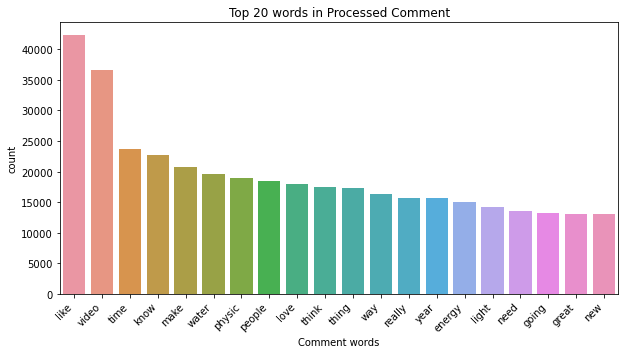

In [229]:
# # Get the top 20 words from the `Processed Comment` column
common_words = get_top_n_bigram(df['Lemmatized Comment'], 20,1)

# Convert the list of tuples to a Pandas dataframe
df2 = pd.DataFrame(common_words, columns = ['Comment words' , 'count'])

# Create a bar plot of the top bigrams using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='Comment words', y='count', data=df2.head(20))
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 words in Processed Comment')
plt.show()

### Plotting most frequent 20 words Bigrams

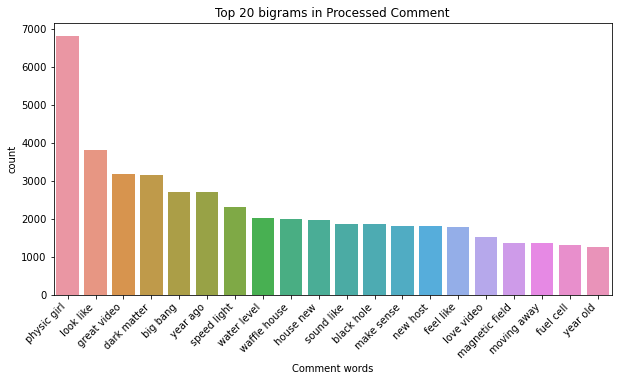

In [231]:
# Get the top 20 bigrams from the `Processed Comment` column
common_words = get_top_n_bigram(df['Lemmatized Comment'], 20,2)

# Convert the list of tuples to a Pandas dataframe
df2 = pd.DataFrame(common_words, columns = ['Comment words' , 'count'])

# Create a bar plot of the top bigrams using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='Comment words', y='count', data=df2.head(20))
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 bigrams in Processed Comment')
plt.show()

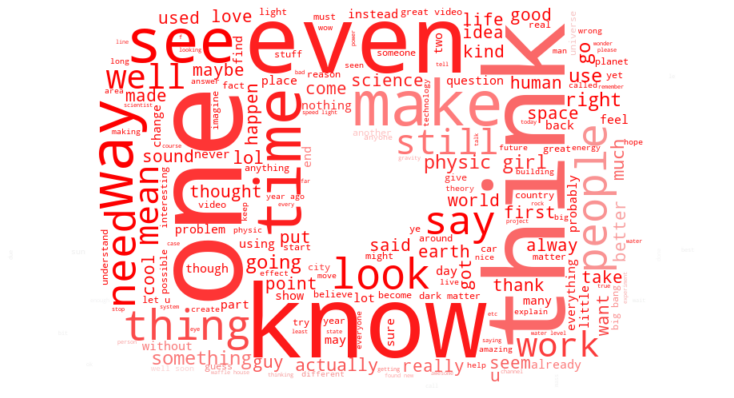

In [233]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/anshu/Downloads/youtube.jpg"))
stopwords = set(STOPWORDS)

comment_text = ' '.join(df['Lemmatized Comment'].values)

wordcloud_youtube = WordCloud(height=1000,
                              width=1000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=stopwords,
                              mask=mask).generate(comment_text)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_youtube.recolor(color_func=image_colors), interpolation="bilinear")

# Store visualization to file
plt.savefig("youtube_logo_unigram.png", format="png")

plt.show()


## TfidfVectorizer

In [187]:
Random_df = pd.DataFrame()
Random_df = df.sample(5000)

In [188]:
Random_df.sample(5)

,Comment (Actual),Lemmatized Comment
818564,Those arms. Someone’s religiously 💪working out..,arm someone religiously working
805401,Since having cataract surgery about 10 years a...,since cataract surgery year ago plastic lens r...
859590,When dark matter split it is held together by ...,dark matter split held together gravitational ...
90775,Bring everyone together exposes them all at on...,bring everyone together expose outside threat ...
196647,Wooohooo onlyfand shower scene what a tropper ...,wooohooo onlyfand shower scene tropper planet


In [189]:
Random_df.shape

(5000, 2)

In [190]:
tfidf_vectorizer = TfidfVectorizer(max_features =10000).fit(df['Lemmatized Comment'] )

tfidf = tfidf_vectorizer.transform(Random_df['Lemmatized Comment'])
tfidf

<5000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49107 stored elements in Compressed Sparse Row format>

In [192]:
Random_df['Lemmatized Comment'].head()

177938    big bang happened exactly center universe wait...
53609              watched three time realized perfect loop
108890    clarified water sent socal headed los angeles ...
122219                                 madam awesome friend
238127    cow make square cow simplicity lol strange act...
Name: Lemmatized Comment, dtype: object

In [194]:
print(f"{tfidf.nnz / np.prod(tfidf.shape):.5f}")

0.00098


In [195]:
tfidf.shape

(5000, 10000)

In [196]:
from sklearn.decomposition import TruncatedSVD

## Dimensionality Reduction using TrubcatedSVD

In [197]:
svd = TruncatedSVD(n_components=1000)
tfidf_svd = svd.fit_transform(tfidf)

# Print the shape of the reduced data
print('Shape of tfidf_svd:', tfidf_svd.shape)

Shape of tfidf_svd: (5000, 1000)


## OUTLIER DETECTION USING MAHANOBIS

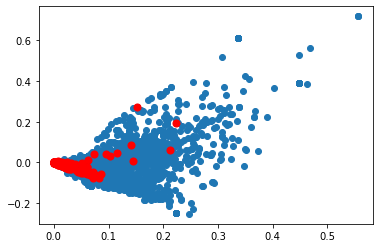

In [198]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Compute the inverse covariance matrix of the data
cov_inv = np.linalg.inv(np.cov(tfidf_svd, rowvar=False))

# Compute the Mahalanobis distances for each data point
distances = [mahalanobis(x, np.mean(tfidf_svd, axis=0), cov_inv) for x in tfidf_svd]

# Identify the data points that have distances greater than a certain threshold
threshold = np.percentile(distances, 95)
outliers = np.where(np.array(distances) > threshold)[0]

# Reduce the data to 2 dimensions using Truncated SVD
svd = TruncatedSVD(n_components=2)
tfidf_svd_2d = svd.fit_transform(tfidf_svd)

# Plot the data points in 2D and highlight the outliers
plt.scatter(tfidf_svd_2d[:, 0], tfidf_svd_2d[:, 1])
plt.scatter(tfidf_svd_2d[outliers, 0], tfidf_svd_2d[outliers, 1], color='r', s=50)
plt.show()


In [199]:
# Compute the inverse covariance matrix of the data
cov_inv = np.linalg.inv(np.cov(tfidf_svd, rowvar=False))

# Compute the Mahalanobis distances for each data point
distances = [mahalanobis(x, np.mean(tfidf_svd, axis=0), cov_inv) for x in tfidf_svd]

# Identify the data points that have distances greater than a certain threshold
threshold = np.percentile(distances, 95)
outliers_idx = np.where(np.array(distances) > threshold)[0]

# Get the outlier data from the original dataframe
outliers_df = Random_df.iloc[outliers_idx]
outliers_df

,Comment (Actual),Lemmatized Comment
197455,"Not to pop your optimism bubble but, It is too...",pop optimism bubble late
157053,he sounds like Tom Hanks,sound like tom hank
35245,whoever has pennsylvania i always root for the...,whoever pennsylvania always root philly boi
232953,My gosh u can handle equations,gosh handle equation
156254,Lol Mojave dessert,lol mojave dessert
...,...,...
858903,283rd!,rd
461420,CERN is obviously Skynet. Dianna is clearly th...,cern obviously skynet dianna clearly newest te...
466793,95% C02..... And 80ﾟF below 0..... Did you cat...,c f catch
152729,Scary stuff !!’,scary stuff


### Implementing Kmeans algorithm

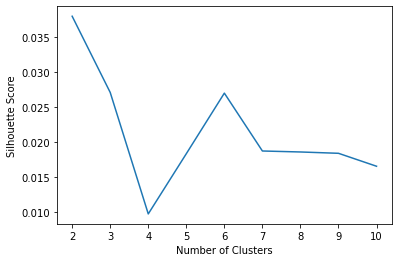

The optimal number of clusters is: 2


In [201]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
num_clusters = range(2, 11)
silhouette_scores = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_svd)
    silhouette_scores.append(silhouette_score(tfidf_svd, cluster_labels))
import matplotlib.pyplot as plt

plt.plot(num_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
optimal_n_clusters = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print("The optimal number of clusters is:", optimal_n_clusters)


In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
num_clusters = 2

# Initialize the k-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

cluster_labels = kmeans.fit_predict(tfidf_svd)
cluster_assignments = kmeans.labels_
# add a new column to the original data frame to store the cluster labels
Random_df['cluster_labels'] = cluster_labels

In [203]:
for i in range(num_clusters):
    num_documents = np.sum(cluster_assignments == i)
    print(f"Cluster {i}: {num_documents} documents")

Cluster 0: 4623 documents
Cluster 1: 377 documents


In [204]:
import pandas as pd

# assuming your original data is stored in a pandas DataFrame called 'df'
# assuming that you have already applied KMeans and obtained cluster labels, stored in a column called 'cluster_labels'

# create two separate data frames based on cluster labels
cluster_0_df = Random_df[Random_df['cluster_labels'] == 0]
cluster_1_df = Random_df[Random_df['cluster_labels'] == 1]
# cluster_2_df = Random_df[Random_df['cluster_labels'] == 2]

# print the number of data points in each cluster
print("Number of data points in cluster 0:", len(cluster_0_df))
print("Number of data points in cluster 1:", len(cluster_1_df))
# print("Number of data points in cluster 2:", len(cluster_2_df))

# display the first 5 rows of each cluster's data frame
# print("Data frame for cluster 0:")
# print(cluster_0_df.head())

# print("Data frame for cluster 1:")
# print(cluster_1_df.head())

cluster_0_df.sample(20)

Number of data points in cluster 0: 4623
Number of data points in cluster 1: 377


,Comment (Actual),Lemmatized Comment,cluster_labels
162261,cmon non of this is anything but common knowle...,cmon non anything common knowledge really appr...,0
835469,I heard a theory that plants don't want green ...,heard theory plant want green light light woul...,0
236506,I like friction. Hehehe! She was able to illus...,like friction hehehe able illustrate different...,0
2448,"Yeah, never made. The last thing a guy wants t...",yeah never made last thing guy want rest head ...,0
169887,You are such a geek! (A high compliment from ...,geek high compliment mechanical engineer thank...,0
104174,It's only a Dream... it/s Impossible,dream impossible,0
267879,"....I love physics, I worry that man in his pu...",love physic worry man pursuit make decision hu...,0
594073,I fly over the Hanford site countless times a ...,fly hanford site countless time year always wo...,0
263057,I won't say anything about your animation at 1...,say anything animation one many zero,0
469953,Very interesting. What's Raquel's tattoo on he...,interesting raquels tattoo right arrn,0


In [205]:
cluster_1_df.sample(15)

,Comment (Actual),Lemmatized Comment,cluster_labels
27580,I watched your artificial womb video and then ...,watched artificial womb video subscribed chann...,1
726901,Watching video in this low res..... :(,watching video low re,1
799207,I love her hair!!! 😍,love hair,1
17944,I love these!,love,1
849448,Actually it's pretty much is a how to video,actually pretty much video,1
154102,That was so good to watch keep up the great work,good watch keep great work,1
816847,Answer to the riddle: I'd make a video of each...,answer riddle would make video eachbar upload ...,1
136981,Great video.,great video,1
794508,@Physics Girl you should do a video on Ringing...,physic girl video ringing rock park pennsylvan...,1
13623,The Amount of Effort Cleo puts into her videos...,amount effort cleo put video amazing energy po...,1


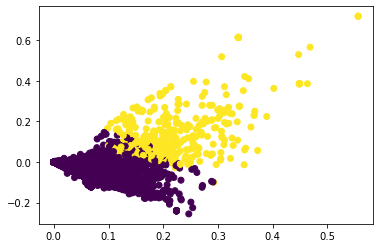

In [206]:
svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(tfidf_svd)

# Create a scatter plot of the reduced matrix, with each point colored according to its cluster assignment
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=cluster_assignments)
plt.show()


### Used majority voting for final labels using three clustering algorithms KMeans, AgglomerativeClustering, SpectralClustering

In [207]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score
from scipy.stats import mode
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=42)
agg = AgglomerativeClustering(n_clusters=2)
spectral = SpectralClustering(n_clusters=2, random_state=42)

cluster_labels = []

for clf in (kmeans, agg, spectral):
    clf.fit(tfidf_svd)
    cluster_labels.append(clf.labels_)

cluster_labels = np.array(cluster_labels)

# Find the most commonly occurring cluster label across all models
majority_vote = mode(cluster_labels, axis=0)
y_pred = majority_vote.mode[0]
sum=0
for i in y_pred:
    if i==1 :
        sum+=1
print(y_pred.shape)
sum 


(5000,)


27

## Evaluating clustering algorithms using metrics 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'

In [208]:
# Fit each model and obtain cluster labels
models = [kmeans, agg, spectral]

cluster_labels = np.array(cluster_labels)

# Compute clustering metrics for each model
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
for i, model in enumerate(models):
    print(f'Model {i+1}: {type(model).__name__}')
    print('-'*50)
    for metric in metrics:
        if metric == 'Silhouette':
            score = silhouette_score(tfidf_svd, cluster_labels[i])
        elif metric == 'Calinski-Harabasz':
            score = calinski_harabasz_score(tfidf_svd, cluster_labels[i])
        elif metric == 'Davies-Bouldin':
            score = davies_bouldin_score(tfidf_svd, cluster_labels[i])
        print(f'{metric} score: {score:.3f}')
    print('\n')


Model 1: KMeans
--------------------------------------------------
Silhouette score: 0.038
Calinski-Harabasz score: 36.106
Davies-Bouldin score: 6.050


Model 2: AgglomerativeClustering
--------------------------------------------------
Silhouette score: 0.106
Calinski-Harabasz score: 37.046
Davies-Bouldin score: 0.991


Model 3: SpectralClustering
--------------------------------------------------
Silhouette score: 0.106
Calinski-Harabasz score: 37.046
Davies-Bouldin score: 0.991




In [209]:
Random_df.shape

(5000, 3)

In [210]:
y_pred_df = pd.DataFrame({'y_pred': y_pred})

y_pred_df

,y_pred
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


###  now training decision tree classfier on the tfidf calculated above and the labeled clusters we got and then predicting labels of our rest of the comments present in our initial dataframe df

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, y_pred_df["y_pred"], test_size=0.2, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the GridSearchCV object on the training data
clf.fit(X_train, y_train)

# Use the best estimator from the GridSearchCV object to make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [212]:
tfidf_vectorizer = TfidfVectorizer(max_features =10000).fit(df['Lemmatized Comment'] )

tfidf = tfidf_vectorizer.transform(df['Lemmatized Comment'])
tfidf

<379032x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3709010 stored elements in Compressed Sparse Row format>

In [213]:
y_final = clf.predict(tfidf)

In [214]:
y_final

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
df['predicted labels'] = y_final

In [216]:
df

,Comment (Actual),Lemmatized Comment,predicted labels
0,zombie spider!! bomb the damn lab before it's ...,zombie spider bomb damn lab late,0
1,"This is way less cool than it seems, spiders a...",way le cool seems spider actually muscle exten...,0
2,Spiders see this and this is why they made the...,spider see made terrifying go poking panic button,0
3,you looks pretty 😍,look pretty,0
4,I can hear the hairs standing up on my wife’s ...,hear hair standing wife arm mile away,0
...,...,...,...
861957,"hey girl,make more vdos and make it lengthy .....",hey girlmake vdos make lengthy really helpful ...,0
861958,Third,third,0
861959,third,third,0
861960,Second,second,0


In [217]:
random_df = pd.DataFrame()
random_df = df.sample(5000)

tfidf_vectorizer = TfidfVectorizer(max_features =1000).fit(df['Lemmatized Comment'] )

tfidf1 = tfidf_vectorizer.transform(random_df['Lemmatized Comment'])
tfidf1

<5000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 34937 stored elements in Compressed Sparse Row format>

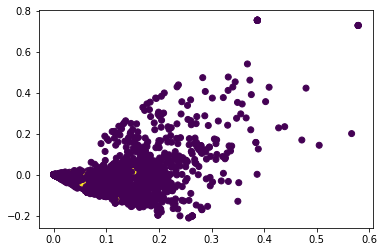

In [219]:
svd1 = TruncatedSVD(n_components=2)
reduced_matrix1 = svd1.fit_transform(tfidf_svd1)

# Create a scatter plot of the reduced matrix, with each point colored according to its cluster assignment
plt.scatter(reduced_matrix1[:, 0], reduced_matrix1[:, 1], c=random_df['predicted labels'])
plt.show()

In [220]:
random_df['predicted labels'].value_counts()

0    4981
1      19
Name: predicted labels, dtype: int64

In [221]:
df['predicted labels'].value_counts()

0    377328
1      1704
Name: predicted labels, dtype: int64

#### Predicted spam comments by our model

In [228]:
spam_df_ = df[df['predicted labels'] == 1]
spam_df_

,Comment (Actual),Lemmatized Comment,predicted labels
4835,Something tells me this host also loves microc...,something tell host also love microchip cashle...,1
5180,"I love this channel. it's simple, non imposing...",love channel simple non imposing host sound li...,1
5287,The Waffle House has found it’s new host,waffle house found new host,1
5441,The waffle house has found its new host,waffle house found new host,1
5484,The waffle House has found its new host,waffle house found new host,1
...,...,...,...
839303,"Amazing channel, impressive content and a real...",amazing channel impressive content really love...,1
840153,"Ashley could host her own channel, Physics Gir...",ashley could host channel physic girl,1
846978,It’s to bad that a potentially interesting vid...,bad potentially interesting video ruined extre...,1
850610,Love Physics Girl but with my strong dislike f...,love physic girl strong dislike bill nye tv sh...,1
